### Random Forest Model for Twitter Bot Account Detection

## Import libraries

In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap

## Load Dataset

In [390]:
df = pd.read_csv('dataset.csv')
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,1217628182611927040,boazbaraktcs,0,4.849,1,0,0.000,458,18518,0.025,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,36741729,Matthew_Brody,1,15.559,0,0,0.000,615,486,1.265,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,1519144464,NikhilSewdass,0,11.433,0,0,0.933,409,191,2.141,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,15211869,jamie_love,0,16.411,1,0,0.000,2617,11131,0.235,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,848975226,fjsantiagoarcos,0,12.148,0,0,0.000,251,116,2.164,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         541 non-null    int64  
 1   screen_name                     541 non-null    object 
 2   is_bot                          541 non-null    int64  
 3   account_age                     541 non-null    float64
 4   is_blue_verified                541 non-null    int64  
 5   is_verified                     541 non-null    int64  
 6   profile_description_sentiment   409 non-null    float64
 7   following_count                 541 non-null    int64  
 8   followers_count                 541 non-null    int64  
 9   following_to_followers_ratio    541 non-null    float64
 10  normal_to_fast_followers_ratio  541 non-null    int64  
 11  tweets_count                    541 non-null    int64  
 12  likes_count                     541 

In [392]:
df.isnull().sum()

user_id                             0
screen_name                         0
is_bot                              0
account_age                         0
is_blue_verified                    0
is_verified                         0
profile_description_sentiment     132
following_count                     0
followers_count                     0
following_to_followers_ratio        0
normal_to_fast_followers_ratio      0
tweets_count                        0
likes_count                         0
media_count                         0
avg_sentiment                       0
replies_ratio                       0
retweets_ratio                      0
freq_of_tweets                      0
identical_tweets_ratio              0
avg_replies_per_tweet               0
avg_urls_per_tweet                  0
avg_likes_per_tweet                 0
possibly_sensitive                  0
profile_image_url                   0
profile_banner_url                  0
is_profile_image_valid              0
followers_to

## Replace any null values with zero

In [393]:
df.fillna(0, inplace=True)

In [394]:
df.isnull().sum()

user_id                           0
screen_name                       0
is_bot                            0
account_age                       0
is_blue_verified                  0
is_verified                       0
profile_description_sentiment     0
following_count                   0
followers_count                   0
following_to_followers_ratio      0
normal_to_fast_followers_ratio    0
tweets_count                      0
likes_count                       0
media_count                       0
avg_sentiment                     0
replies_ratio                     0
retweets_ratio                    0
freq_of_tweets                    0
identical_tweets_ratio            0
avg_replies_per_tweet             0
avg_urls_per_tweet                0
avg_likes_per_tweet               0
possibly_sensitive                0
profile_image_url                 0
profile_banner_url                0
is_profile_image_valid            0
followers_to_likes_ratio          0
dtype: int64

In [395]:
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,1217628182611927040,boazbaraktcs,0,4.849,1,0,0.000,458,18518,0.025,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,36741729,Matthew_Brody,1,15.559,0,0,0.000,615,486,1.265,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,1519144464,NikhilSewdass,0,11.433,0,0,0.933,409,191,2.141,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,15211869,jamie_love,0,16.411,1,0,0.000,2617,11131,0.235,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,848975226,fjsantiagoarcos,0,12.148,0,0,0.000,251,116,2.164,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


## Feature Engineering

### Drop irrelevent values to training

We want to drop user_id and screen_name as those are irrelevant to bot status. is_verified can be dropped since none of the accounts we are analyzing are organizations.

In [396]:
df.drop(columns=['user_id', 'screen_name',], inplace=True)

In [397]:
df.head()

,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,0,4.849,1,0,0.000,458,18518,0.025,18518,7513,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,1,15.559,0,0,0.000,615,486,1.265,486,5160,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,0,11.433,0,0,0.933,409,191,2.141,191,1385,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,0,16.411,1,0,0.000,2617,11131,0.235,11131,67673,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,0,12.148,0,0,0.000,251,116,2.164,116,689,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


## Create target variable

In [398]:
Y = df.is_bot
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: is_bot, dtype: int64

## Drop the target variable : is_bot

Ensure model is trained on input variables and not outcomes

In [399]:
df.drop('is_bot', inplace=True, axis=1)

In [400]:
df.head()

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,likes_count,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,4.849,1,0,0.000,458,18518,0.025,18518,7513,9619,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,15.559,0,0,0.000,615,486,1.265,486,5160,24506,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,11.433,0,0,0.933,409,191,2.141,191,1385,157004,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,16.411,1,0,0.000,2617,11131,0.235,11131,67673,23019,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,12.148,0,0,0.000,251,116,2.164,116,689,952,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


In [401]:
X = df

In [402]:
X

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,likes_count,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,4.849,1,0,0.000,458,18518,0.025,18518,7513,9619,...,1549.392,0.000,1.560,0.260,35.520,0,1,1,0,521.340
1,15.559,0,0,0.000,615,486,1.265,486,5160,24506,...,331.641,0.000,0.000,0.000,0.000,0,1,1,0,0.000
2,11.433,0,0,0.933,409,191,2.141,191,1385,157004,...,121.141,0.000,0.000,0.000,1.000,0,1,1,0,191.000
3,16.411,1,0,0.000,2617,11131,0.235,11131,67673,23019,...,4123.637,0.000,1.099,0.383,4.123,0,1,1,0,2699.434
4,12.148,0,0,0.000,251,116,2.164,116,689,952,...,56.717,0.000,1.000,0.667,7.667,0,1,1,0,15.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,11.483,0,0,0.000,1178,4102,0.287,4102,1444,5155,...,125.751,0.000,1.947,0.132,41.263,0,1,1,0,99.411
537,2.850,0,0,0.000,121,16,7.562,16,40,11,...,14.035,0.000,0.000,0.000,0.000,0,1,0,0,0.000
538,15.759,0,0,0.780,2276,3447,0.660,3447,112718,53562,...,7152.611,0.064,0.052,0.000,0.862,0,1,1,0,3998.520
539,12.285,0,0,0.610,733,2250,0.326,2250,2443,1053,...,198.860,0.000,0.267,0.267,2.467,0,1,1,0,912.162


## Split Data into Test & Training

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

30% for testing, 70% for training, use random state to produce same outcomes

In [404]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (378, 24)
X_test:  (163, 24)
Y_train:  (378,)
Y_test:  (163,)


## Training Random Forest Classification on Training Set

In [405]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

criterion: how the decision trees are splitting nodes. either 'gini' or 'entropy'
n_estimators: the number of decision trees in the forest. we want ~100
max_samples: how many rows are being considered in each decision tree. we want all of them, leave empty

## Predicting Test Results

In [406]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0])

## Confusion Matrix

In [407]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [408]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[57 29]
 [16 61]]


confusion matrix tells us the results of the testing
[ true positive - predicted bot accurately,   incorrectly predicted human
  false positive - incorrectly predicted bot, predicted human accurately  ]

In [409]:
round(accuracy_score(Y_test, y_pred), 3)

0.724

In [410]:
classification_report(Y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.66      0.72        86\n           1       0.68      0.79      0.73        77\n\n    accuracy                           0.72       163\n   macro avg       0.73      0.73      0.72       163\nweighted avg       0.73      0.72      0.72       163\n'

## Use SHAP to interpret the importance of features in the model (fine tuning)

In [411]:
explainer = shap.TreeExplainer(model)

In [412]:
shap_values = explainer.shap_values(X_test)

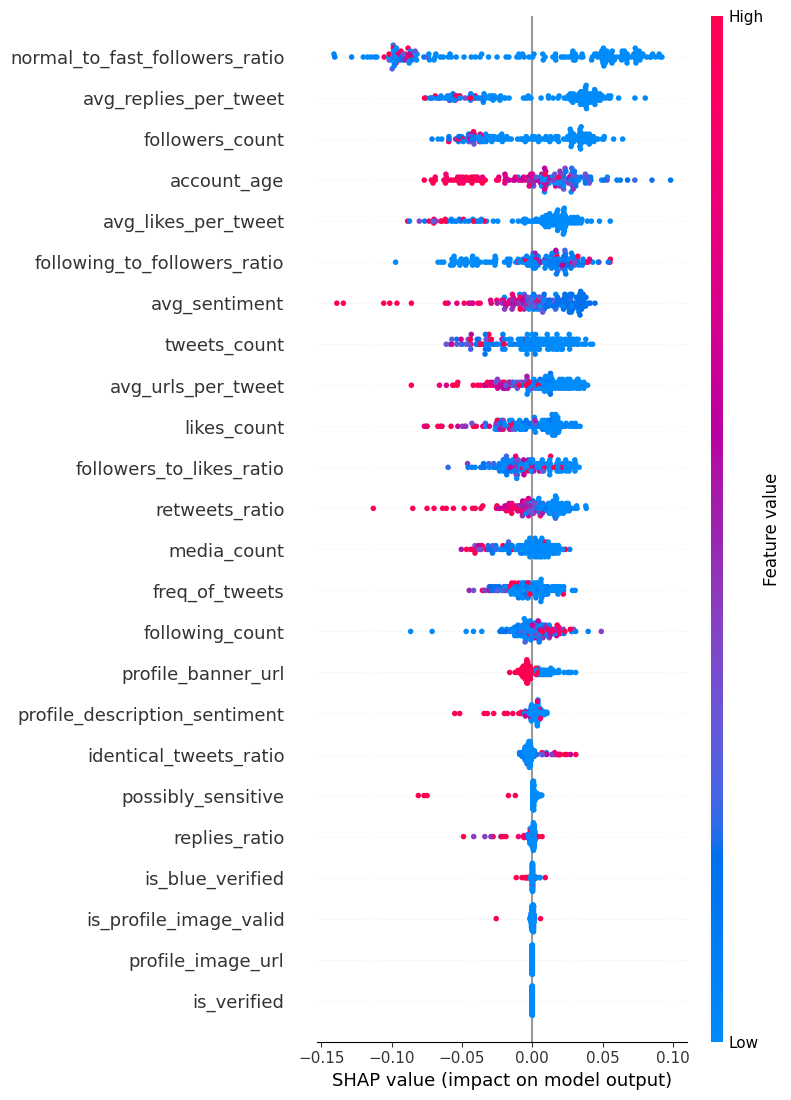

In [413]:
shap.summary_plot(shap_values[:,:,1], X_test, max_display=X_test.shape[1])

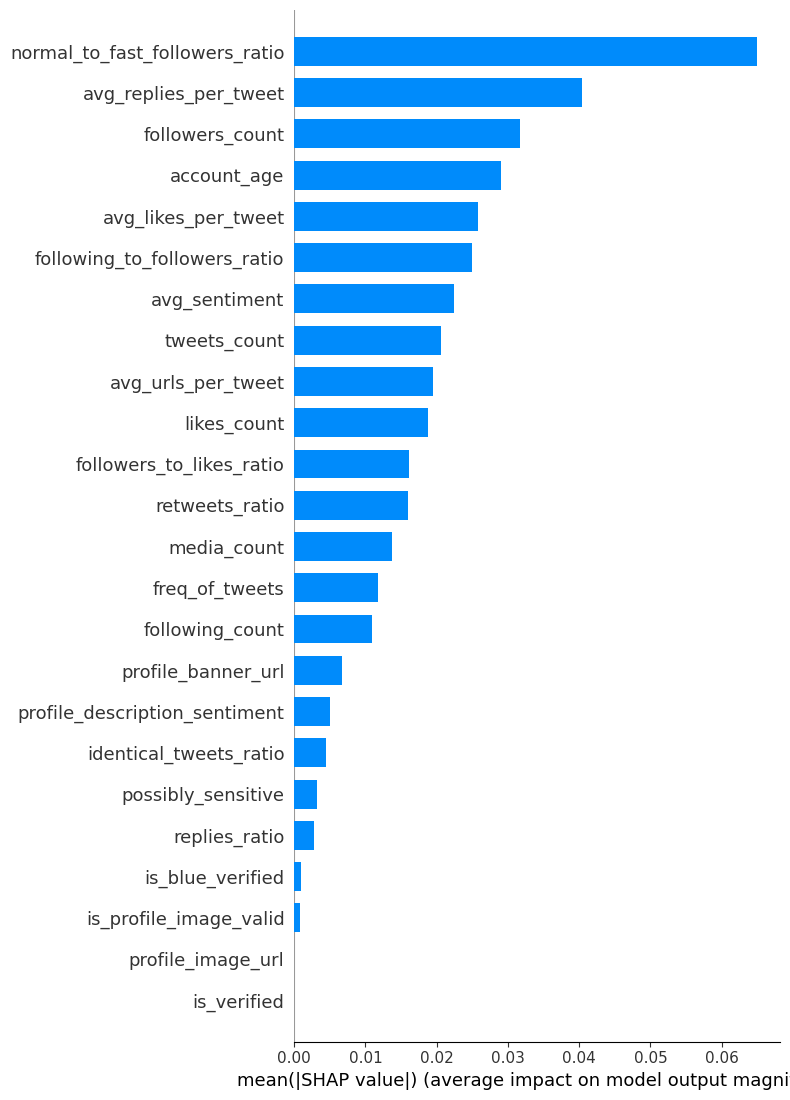

In [414]:
shap.summary_plot(shap_values[:,:,1], X_test, plot_type='bar', max_display=X_test.shape[1])

From these summary plots, we learn that is_verified, profile_image_url, is_profile_image_valid, is_blue_verified, possibly_sensitive, and replies_ratio are not impacting the model output.  

## Feature Engineering (2)

In [415]:
X.drop(columns=['is_verified', 'profile_image_url',], inplace=True)

In [416]:
X.head()

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,likes_count,media_count,...,retweets_ratio,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,4.849,1,0.000,458,18518,0.025,18518,7513,9619,707,...,0.580,1549.392,0.0,1.560,0.260,35.520,0,1,0,521.340
1,15.559,0,0.000,615,486,1.265,486,5160,24506,109,...,0.000,331.641,0.0,0.000,0.000,0.000,0,1,0,0.000
2,11.433,0,0.933,409,191,2.141,191,1385,157004,20,...,0.970,121.141,0.0,0.000,0.000,1.000,0,1,0,191.000
3,16.411,1,0.000,2617,11131,0.235,11131,67673,23019,3160,...,0.283,4123.637,0.0,1.099,0.383,4.123,0,1,0,2699.434
4,12.148,0,0.000,251,116,2.164,116,689,952,4,...,0.970,56.717,0.0,1.000,0.667,7.667,0,1,0,15.130


## Retrain Model

In [417]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

## Test Results

In [418]:
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: ', cm)
print('Accuracy Score: ', round(accuracy_score(Y_test, y_pred), 3))
print('Classification Report: ', classification_report(Y_test, y_pred))

Confusion Matrix:  [[60 26]
 [17 60]]
Accuracy Score:  0.736
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.70      0.74        86
           1       0.70      0.78      0.74        77

    accuracy                           0.74       163
   macro avg       0.74      0.74      0.74       163
weighted avg       0.74      0.74      0.74       163

